In [1]:
# Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [5]:
# Import data

df = pd.read_csv("P:\Work in Progress\Mike Taylor\python\RecessionTimingRawData2024.csv")
df["s3_ur"] = df.ur.diff(3)
df.head(12)

,period,r10yr,rff,rbaa,r3mo,r1yr,r3yr,r5yr,rec,rec12mo,...,emp,ur,sp500,ip,cycle,r10yrffma,s6_lnsp500,s6_lnemp,s6_lnip,s3_ur
0,4/1/1953,2.83,NaN,3.65,2.19,2.36,2.51,2.62,0.0,1.0,...,50435,2.7,24.71,20.1048,prerecession,NaN,NaN,NaN,NaN,NaN
1,5/1/1953,3.05,NaN,3.78,2.16,2.48,2.72,2.87,0.0,1.0,...,50490,2.5,24.84,20.2156,prerecession,NaN,NaN,NaN,NaN,NaN
2,6/1/1953,3.11,NaN,3.86,2.11,2.45,2.74,2.94,0.0,1.0,...,50519,2.5,23.95,20.1325,prerecession,NaN,NaN,NaN,NaN,NaN
3,7/1/1953,2.93,NaN,3.86,2.04,2.38,2.62,2.75,0.0,1.0,...,50536,2.6,24.29,20.3817,prerecession,NaN,NaN,NaN,NaN,-0.1
4,8/1/1953,2.95,NaN,3.85,2.04,2.28,2.58,2.80,1.0,1.0,...,50489,2.7,24.39,20.2709,recession,NaN,NaN,NaN,NaN,0.2
5,9/1/1953,2.87,NaN,3.88,1.79,2.20,2.56,2.71,1.0,1.0,...,50368,2.9,23.27,19.8556,recession,NaN,NaN,NaN,NaN,0.4
6,10/1/1953,2.66,NaN,3.82,1.38,1.79,2.23,2.43,1.0,1.0,...,50240,3.1,23.97,19.6894,recession,NaN,-0.030405,-0.003874,-0.020878,0.5
7,11/1/1953,2.68,NaN,3.75,1.44,1.67,2.20,2.42,1.0,1.0,...,49908,3.5,24.50,19.2186,recession,NaN,-0.013782,-0.011594,-0.050576,0.8
8,12/1/1953,2.59,NaN,3.74,1.60,1.66,2.07,2.32,1.0,1.0,...,49703,4.5,24.83,18.7479,recession,NaN,0.036084,-0.016284,-0.071254,1.6
9,1/1/1954,2.48,NaN,3.71,1.18,1.41,1.89,2.17,1.0,1.0,...,49469,4.9,25.46,18.6094,recession,NaN,0.047044,-0.021340,-0.090971,1.8


In [6]:
# Select subset of data

df2_oos = df[["period","rec","s6_lnsp500","s6_lnemp","s3_ur"]][~np.isnan(df.s6_lnsp500) & np.isnan(df.rec)]

df2 = df[["period","rec","s6_lnsp500","s6_lnemp","s3_ur"]][~np.isnan(df.s6_lnsp500) & ~np.isnan(df.rec)]
df2.tail()

,period,rec,s6_lnsp500,s6_lnemp,s3_ur
800,12/1/2019,0.0,0.094545,0.006265,0.1
801,1/1/2020,0.0,0.089979,0.007334,0.0
802,2/1/2020,0.0,0.123177,0.007606,-0.1
803,3/1/2020,1.0,-0.117184,-0.003044,0.8
804,4/1/2020,1.0,-0.075197,-0.149541,11.2


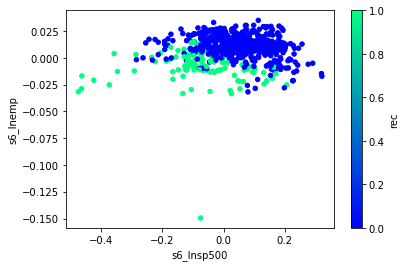

In [31]:
# Scatter plot of SP500 vs Emp (during recessions and expansions)

fig, ax = plt.subplots()
sc = df2.plot.scatter(x='s6_lnsp500', y='s6_lnemp', c='rec', colormap='winter', ax=ax) # rainbow

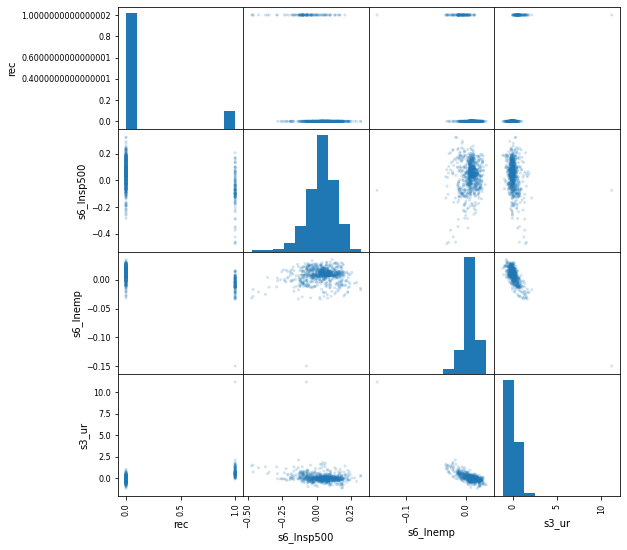

In [16]:
axes = pd.plotting.scatter_matrix(df2, alpha = 0.2, figsize = (9, 9), range_padding = 0.15)

In [28]:
from sklearn.model_selection import train_test_split

y = df2["rec"]
X = df2[["s6_lnsp500","s6_lnemp"]] # ,"s3_ur"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

y_oos = df2_oos["rec"]
X_oos = df2_oos[["s6_lnsp500","s6_lnemp","s3_ur"]]

In [29]:
# Models: Logistic, Random Forest, SVC, Voting Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42, probability=True)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft') # hard

voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8598484848484849
RandomForestClassifier 0.9166666666666666
SVC 0.9204545454545454
VotingClassifier 0.9318181818181818


In [41]:
# Model: Decision Tree

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.9090909090909091


In [40]:
# Model: Bagging ensembles (of Decision Trees)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(bag_clf.__class__.__name__, accuracy_score(y_test, y_pred))

BaggingClassifier 0.9128787878787878


In [58]:
# Plot with decision boundary

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-.3, .3, -.05, .05], alpha=0.5, contour=True): # axes=[0, 8, 0, 8]
    X = X.to_numpy() # as_matrix() # added code to convert dataframe X to array X
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

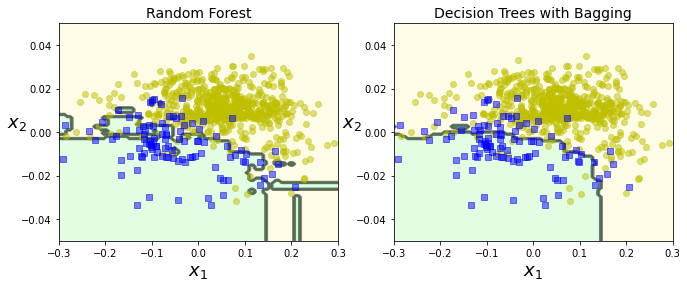

In [46]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(rnd_clf, X, y)
plt.title("Random Forest", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
# save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

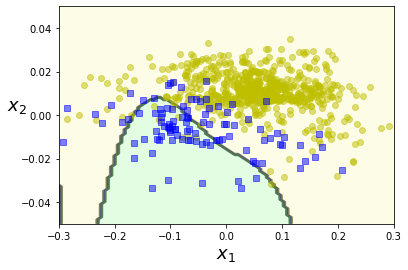

In [60]:
plot_decision_boundary(svm_clf, X, y)

In [ ]:
# get plot to accept more than two X vars in classifier (but still only charting 2)
# add more vars to classifier
# see if way to play with svm parameters? higher dimensions?
# play with random forest/bagging parameters? (see other notebook)
# change from rec to rec12mo?
